In [3]:
import pandas as pd
df = pd.read_excel('fitness_data.xlsx')
df.head()

,name,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)
0,Akshay,10500,4500,7.5,80
1,Priya,9800,4200,7.2,75
2,Raj,11500,4800,7.0,90
3,Emily,12000,5000,7.8,85
4,Rohit,8900,4000,7.0,70


In [5]:
df.describe()

,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)
count,50.000000,50.000000,50.000000,50.000000
mean,10316.000000,4418.000000,7.396000,79.600000
std,1177.052701,370.708092,1.660951,14.457538
min,8000.000000,3700.000000,4.000000,30.000000
25%,9625.000000,4200.000000,7.000000,70.000000
50%,10250.000000,4400.000000,7.200000,80.000000
75%,11000.000000,4700.000000,7.500000,90.000000
max,15000.000000,5500.000000,18.000000,100.000000


In [8]:
steps_taken_range = df.steps_taken.max() - df.steps_taken.min()
calories_burned_range = df["calories_burned"].max() - df["calories_burned"].min()
sleep_duration_iqr = df["sleep_duration(hours)"].quantile(0.75) - df["sleep_duration(hours)"].quantile(0.25)
water_intake_iqr = df["water_intake(ounces)"].quantile(0.75) - df["water_intake(ounces)"].quantile(0.25)

print("Range of Steps Taken:", steps_taken_range)
print("Range of Calories Burned:", calories_burned_range)
print("IQR of Sleep Duration:", sleep_duration_iqr)
print("IQR of Water Intake:", water_intake_iqr)

Range of Steps Taken: 7000
Range of Calories Burned: 1800
IQR of Sleep Duration: 0.5
IQR of Water Intake: 20.0


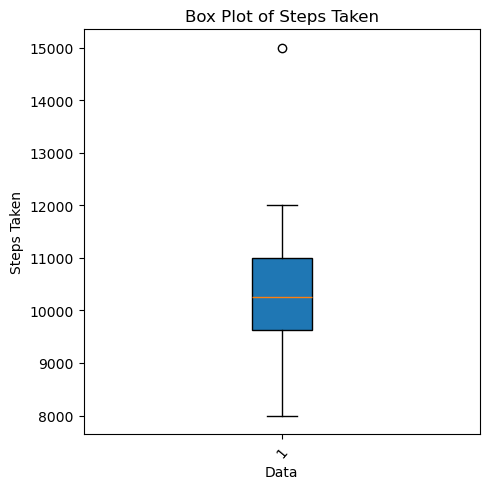

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5,5))
plt.boxplot(df['steps_taken'],vert = True , patch_artist = True)
plt.title('Box Plot of Steps Taken')
plt.xlabel('Data')
plt.ylabel('Steps Taken')
plt.xticks(rotation = 50)
plt.tight_layout()
plt.show()

In [10]:
#### Observations

#Most individuals appear to have a median daily step count around 10,000 as indicated by the orange line within the box.
#The presence of an outlier at 15,000 indicates that there is at least one individual who took an exceptionally high number of steps. This could be due to various reasons, such as an unusually active day or a measurement error.

In [11]:
def get_lower_upper(data) :
    Q1,Q3 = data['sleep_duration(hours)'].quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return lower,upper

In [13]:
lower,upper = get_lower_upper(df)
lower,upper

(6.25, 8.25)

In [14]:
# Identify and label outliers
outliers = df[(df["sleep_duration(hours)"] < lower ) | (df["sleep_duration(hours)"] > upper)]


# Display the outliers
outliers

,name,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)
21,Elena,11700,4900,18.0,100
30,Siddharth,11300,4700,4.0,75
